In [4]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import rasterio
import imageio
from tqdm import tqdm
from PIL import Image, ImageDraw, ImageFont
import rasterio.mask
from shapely.geometry import box
import geopandas as gpd
from pyproj import Transformer
import time
import shapely
import re
import datetime
import netCDF4 as nc
import string

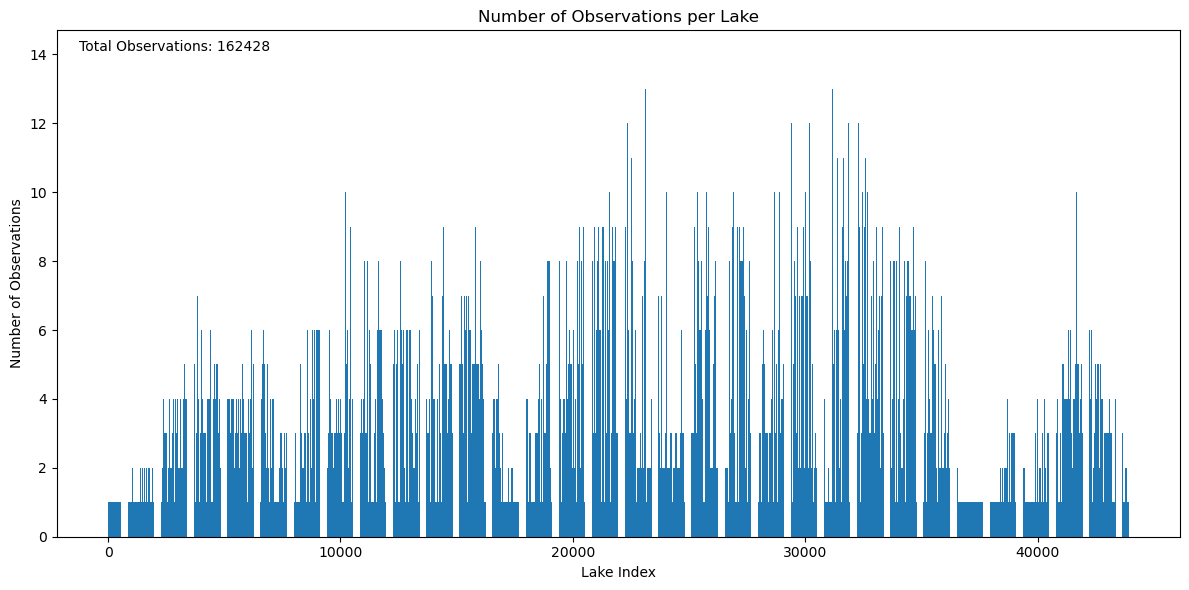

In [5]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Path to your NetCDF file
netcdf_path = r"D:\planetscope_lake_ice\Data (Unclassified)\2 - Break Up Time Series Output\lake_statistics_new.nc"

# Open the NetCDF file
with nc.Dataset(netcdf_path, 'r') as ncfile:
    # Get lake IDs and observation counts
    lake_ids = ncfile.variables['lake_id'][:]
    observation_counts = ncfile.variables['count'][:]  

# Create the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(len(lake_ids)), observation_counts)
plt.title('Number of Observations per Lake')
plt.xlabel('Lake Index')
plt.ylabel('Number of Observations')
plt.tight_layout()

# Add total observations annotation
total_observations = observation_counts.sum()
plt.text(0.02, 0.98, f'Total Observations: {total_observations}', 
         transform=plt.gca().transAxes, 
         verticalalignment='top')

plt.show()

In [6]:
# Path to your NetCDF file
netcdf_path = r"D:\planetscope_lake_ice\Data (Unclassified)\2 - Break Up Time Series Output\lake_statistics_new.nc"

# Open the NetCDF file
with nc.Dataset(netcdf_path, 'r') as ncfile:
    # Get lake IDs and observation counts
    lake_ids = ncfile.variables['lake_id'][:]
    observation_counts = ncfile.variables['count'][:]
    areas = ncfile.variables['area'][:]
    study_sites = ncfile.variables['study_site'][:]

# Create a DataFrame
df = pd.DataFrame({
    'Lake ID': lake_ids,
    'Number of Observations': observation_counts,
    'Area': areas,
    'Study Site': study_sites
})

# Sort by number of observations in descending order
top_lakes = df.sort_values('Number of Observations', ascending=False).head(20)

print("Top 20 Lakes by Number of Observations:")
print(top_lakes.to_string(index=False))

# Calculate some statistics
total_lakes = len(lake_ids)
total_observations = observation_counts.sum()

print(f"\nTotal Lakes: {total_lakes}")
print(f"Total Observations: {total_observations}")
print(f"Average Observations per Lake: {total_observations/total_lakes:.2f}")

Top 20 Lakes by Number of Observations:
 Lake ID  Number of Observations         Area Study Site
  183702                      14  1895.513672        YKD
  183382                      14  1166.359863        YKD
  188131                      14 25501.548828        YKD
  188510                      14  1946.934814        YKD
  174110                      14  2713.836914        YKD
  188251                      14  6813.818359        YKD
  187864                      14  1265.306885        YKD
  188088                      14 13675.660156        YKD
  174156                      14  2713.887207        YKD
  188741                      14  9929.989258        YKD
  188062                      14  2141.407715        YKD
  188521                      14  1022.148315        YKD
  183602                      14 12684.851562        YKD
  188488                      14 14893.734375        YKD
  188105                      14 25842.943359        YKD
  185058                      14  5300.036133   

In [7]:
def check_lake_data(netcdf_path, lake_id=None):
    """
    Read and display lake data from a NetCDF file.
    
    Parameters:
    -----------
    netcdf_path : str
        Path to the NetCDF file
    lake_id : int, optional
        Specific lake ID to inspect. If None, lists all lake IDs.
    """
    # Open the NetCDF file
    with nc.Dataset(netcdf_path, 'r') as ncfile:
        # Get all lake IDs
        lake_ids = ncfile.variables['lake_id'][:]
        
        # Find the index of the specified lake
        try:
            lake_index = np.where(lake_ids == lake_id)[0][0]
        except IndexError:
            print(f"Lake ID {lake_id} not found in the dataset.")
            return
        
        # Print lake-level metadata
        print(f"\nLake ID: {lake_id}")
        #print(f"Lake Index: {lake_index}")
        print(f"Area: {ncfile.variables['area'][lake_index]} sq meters")
        print(f"Perimeter: {ncfile.variables['perimeter'][lake_index]} meters")
        print(f"Study Site: {ncfile.variables['study_site'][lake_index]}")
        print(f"Total Pixels: {ncfile.variables['total_pixels'][lake_index]}")
        print(f"Number of Observations: {ncfile.variables['count'][lake_index]}")
        
        # Get the observations for this lake 
        obs_indices = np.where(ncfile.variables['lake_index'][:] == lake_index)[0]
        
        if len(obs_indices) == 0:
            print("No observations found for this lake.")
            return
            
        # Get data for these observations
        data = {
            'Index': obs_indices,
            'Date (Unix)': ncfile.variables['datetime'][obs_indices],
            'Prefix': ncfile.variables['prefix'][obs_indices],
            'usable_pixels': ncfile.variables['usable_pixels'][obs_indices],
            'clear_percent': ncfile.variables['clear_percent'][obs_indices],
            'ice_pixels': ncfile.variables['ice_pixels'][obs_indices],
            'ice_percent': ncfile.variables['ice_percent'][obs_indices],
            'snow_pixels': ncfile.variables['snow_pixels'][obs_indices],
            'snow_percent': ncfile.variables['snow_percent'][obs_indices],
            'water_pixels': ncfile.variables['water_pixels'][obs_indices],
            'water_percent': ncfile.variables['water_percent'][obs_indices]
        }
        
        # Convert to DataFrame
        df = pd.DataFrame(data)
        
        # Add human-readable datetime
        df['Datetime'] = df['Date (Unix)'].apply(
            lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')
        )
        
        # Display the observations
        print("\nOBSERVATIONS ({}):".format(len(obs_indices)))
        print(df.to_string(index=False))


# CHOOSE YOUR LAKE NUMBER HERE
lake_id=675598

# Replace with the path to your NetCDF file
netcdf_path = r"D:\planetscope_lake_ice\Data (Unclassified)\2 - Break Up Time Series Output\lake_statistics_new.nc"

# To check a specific lake (uncomment and replace with desired lake ID)
check_lake_data(netcdf_path, lake_id)


Lake ID: 675598
Area: 20711.640625 sq meters
Perimeter: 860.3373413085938 meters
Study Site: YF
Total Pixels: 2304
Number of Observations: 4

OBSERVATIONS (4):
 Index  Date (Unix)                                   Prefix  usable_pixels  clear_percent  ice_pixels  ice_percent  snow_pixels  snow_percent  water_pixels  water_percent            Datetime
159581   1683506280 20230507_203800_49_24c9_3B_AnalyticMS_SR           2304          100.0        1078    46.787998         1226     53.212002             0       0.000000 2023-05-07 20:38:00
159582   1683508112 20230507_210832_51_2482_3B_AnalyticMS_SR           2304          100.0        1292    56.076000         1012     43.924000             0       0.000000 2023-05-07 21:08:32
159583   1683940058 20230512_210738_61_241c_3B_AnalyticMS_SR           2304          100.0         813    35.285999            0      0.000000          1491      64.713997 2023-05-12 21:07:38
159584   1684456785 20230518_203945_30_24cf_3B_AnalyticMS_SR           

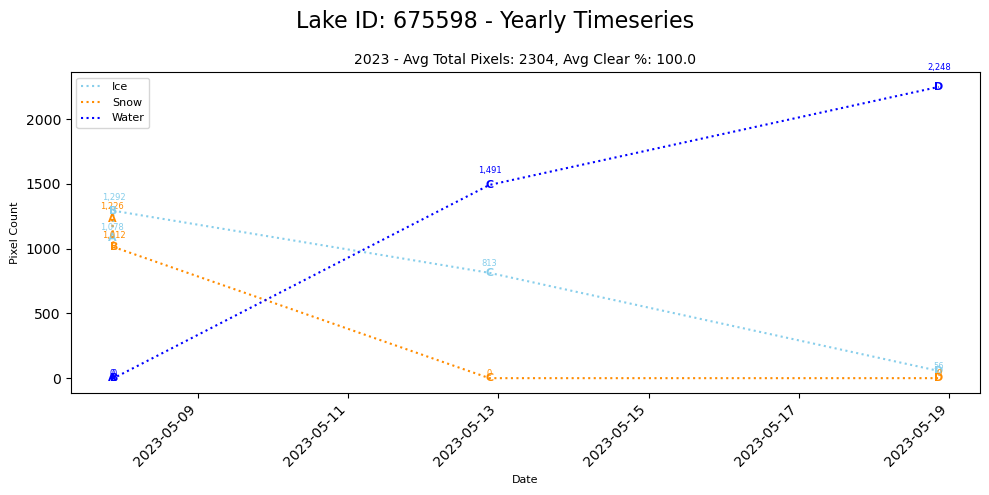

In [8]:
import re
import datetime
import numpy as np
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
import string

def parse_datetime(prefix):
    """
    Attempts to extract 'YYYYMMDD' and 'HHMMSS' from the start of the prefix
    """
    match = re.match(r"^(\d{8})_(\d{6})", prefix)
    if match:
        date_str = match.group(1)  # e.g. 20230507
        time_str = match.group(2)  # e.g. 203800
        return datetime.datetime.strptime(date_str + time_str, "%Y%m%d%H%M%S")
    return None

def plot_lake_timeseries_yearly(lake_id, netcdf_path, base_image_folder):
    """
    Plots a timeseries of ice_pixels, snow_pixels, and water_pixels for the specified lake_id
    with adaptive subplot layout
    """
    # Open the NetCDF file
    nc_file = nc.Dataset(netcdf_path, 'r')
    
    # Find the index of the specified lake
    lake_ids = nc_file.variables['lake_id'][:]
    lake_index = np.where(lake_ids == lake_id)[0]
    
    if len(lake_index) == 0:
        print(f"No data found for lake_id {lake_id}.")
        nc_file.close()
        return

    lake_index = lake_index[0]
    
    # Prepare data for plotting
    data = {
        'date_prefix': [],
        'datetime': [],
        'ice_pixels': [],
        'snow_pixels': [],
        'water_pixels': [],
        'total_pixels': [],
        'clear_percent': []
    }
    
    # Find observations for this lake
    observation_indices = np.where(nc_file.variables['lake_index'][:] == lake_index)[0]
    
    if len(observation_indices) == 0:
        print(f"No observations found for lake_id {lake_id}.")
        nc_file.close()
        return
    
    # Extract data for this lake
    for idx in observation_indices:
        # Get prefix
        prefix = nc_file.variables['prefix'][idx]
        
        # Convert timestamp to datetime
        timestamp = nc_file.variables['datetime'][idx]
        dt = datetime.datetime.fromtimestamp(timestamp)
        
        data['date_prefix'].append(prefix)
        data['datetime'].append(dt)
        data['ice_pixels'].append(nc_file.variables['ice_pixels'][idx])
        data['snow_pixels'].append(nc_file.variables['snow_pixels'][idx])
        data['water_pixels'].append(nc_file.variables['water_pixels'][idx])
        data['usable_pixels'] = nc_file.variables['usable_pixels'][idx]
        data['total_pixels'].append(nc_file.variables['total_pixels'][lake_index])
        data['clear_percent'].append(nc_file.variables['clear_percent'][idx])
    
    # Convert to DataFrame
    df_lake = pd.DataFrame(data)
    nc_file.close()
    
    # Group by year
    df_lake['year'] = df_lake['datetime'].dt.year
    years = sorted(df_lake['year'].unique())
    
    # Determine grid layout
    n_years = len(years)
    
    # Choose subplot layout based on number of years
    if n_years <= 1:
        # Single plot
        fig, axes = plt.subplots(1, 1, figsize=(10, 5))
        axes = [axes]
    elif n_years <= 2:
        # 1x2 grid
        fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    elif n_years <= 4:
        # 2x2 grid
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    else:
        # More than 4 years, use 2x2 and warn
        print(f"Warning: More than 4 years of data. Only first 4 years will be plotted.")
        years = years[:4]
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Flatten axes for easier iteration
    axes_flat = axes.flatten() if n_years > 1 else axes
    
    # Figure title
    fig.suptitle(f"Lake ID: {lake_id} - Yearly Timeseries", fontsize=16)
    
    # Define colors for each metric
    ice_color   = '#87CEEB'
    snow_color  = '#FF8C00'
    water_color = '#0000FF'
    
    # Plot for each year
    for i, year in enumerate(years):
        # Get data for this year
        df_year = df_lake[df_lake['year'] == year].copy()  # Use .copy() to avoid SettingWithCopyWarning
        
        # Select subplot
        ax = axes_flat[i]
        
        # Assign letter labels
        letters = list(string.ascii_uppercase)
        df_year.loc[:, 'label'] = [letters[j] for j in range(len(df_year))]
        
        # Plot metrics
        ax.plot(df_year["datetime"], df_year["ice_pixels"],   linestyle=':', color=ice_color,   label="Ice")
        ax.plot(df_year["datetime"], df_year["snow_pixels"],  linestyle=':', color=snow_color,  label="Snow")
        ax.plot(df_year["datetime"], df_year["water_pixels"], linestyle=':', color=water_color, label="Water")
        
        # Annotate each point
        for _, row in df_year.iterrows():
            label = row["label"]
            dt = row["datetime"]
            
            # Annotate metrics
            for metric, color, offset in [
                ("ice_pixels", ice_color, -2),
                ("snow_pixels", snow_color, 0),
                ("water_pixels", water_color, 2)
            ]:
                value = row[metric]
                if pd.notna(value):
                    # Slight time offset for better readability
                    dt_offset = dt + datetime.timedelta(minutes=offset)
                    
                    ax.text(dt_offset, value, label, ha="center", va="center",
                             color=color, fontweight="bold", fontsize=8)
                    ax.text(dt_offset, value + 0.05 * value,
                             f"{int(value):,}", ha="center", va="bottom",
                             color=color, fontsize=6)
        
        # Calculate averages for subtitle
        avg_total = df_year["total_pixels"].mean(skipna=True)
        avg_clear = df_year["clear_percent"].mean(skipna=True)
        
        ax.set_title(
            f"{year} - Avg Total Pixels: {avg_total:.0f}, Avg Clear %: {avg_clear:.1f}",
            fontsize=10
        )
        ax.set_xlabel("Date", fontsize=8)
        ax.set_ylabel("Pixel Count", fontsize=8)
        ax.legend(fontsize=8)
        
        # Rotate x-axis labels for readability
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Remove any unused subplots
    for j in range(i+1, len(axes_flat)):
        fig.delaxes(axes_flat[j])
    
    plt.tight_layout()
    plt.show()

# Set paths
base_image_folder = r"D:\planetscope_lake_ice\Data (Unclassified)\2 - Break Up Time Series Output\Downsampled RGBs"

plot_lake_timeseries_yearly(lake_id, netcdf_path, base_image_folder)

GIF already exists at D:\planetscope_lake_ice\Data (Unclassified)\2 - Break Up Time Series Output\Visualization GIFs\lake_183702_2023_timelapse.gif. Skipping generation.


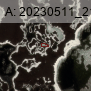

In [17]:
def find_image_paths(base_dir, prefixes):
    """Find full paths for image files matching given prefixes."""
    import os
    import glob
    
    matching_images = []
    
    for prefix in prefixes:
        search_pattern = os.path.join(base_dir, '**', f'{prefix}.tif')
        matches = glob.glob(search_pattern, recursive=True)
        
        if matches:
            matching_images.extend(matches)
        else:
            print(f"Warning: No image found for prefix {prefix}")
    
    return sorted(matching_images)

def get_lake_polygon(shapefile_path, lake_id):
    """Retrieve the polygon and CRS for a specific lake from a shapefile."""
    import geopandas as gpd
    
    gdf = gpd.read_file(shapefile_path)
    lake_row = gdf[gdf['id'] == lake_id]
    
    if len(lake_row) == 0:
        print(f"No lake found with ID {lake_id}")
        return None, None
    
    return lake_row.geometry.iloc[0], lake_row.crs

def create_lake_bounds(lake_polygon, polygon_crs, src_crs):
    """
    Create a bounding box for the lake, transformed to the source CRS.
    
    Args:
        lake_polygon (shapely.geometry.Polygon): Lake polygon
        polygon_crs (pyproj.CRS): CRS of the original polygon
        src_crs (pyproj.CRS): Target CRS to transform to
    
    Returns:
        tuple: Bounding box coordinates (left, bottom, right, top)
    """
    import shapely
    import geopandas as gpd
    from pyproj import Transformer
    
    # Create transformer
    transformer = Transformer.from_crs(polygon_crs, src_crs, always_xy=True)
    
    # Transform polygon coordinates
    transformed_coords = []
    for x, y in lake_polygon.exterior.coords:
        transformed_x, transformed_y = transformer.transform(x, y)
        transformed_coords.append((transformed_x, transformed_y))
    
    # Create a new polygon with transformed coordinates
    transformed_polygon = gpd.GeoSeries([shapely.geometry.Polygon(transformed_coords)], crs=src_crs)[0]
    
    # Get the geographic bounds
    left, bottom, right, top = transformed_polygon.bounds
    
    # Calculate the current width and height
    width = right - left
    height = top - bottom
    
    # Add 500m to sides 
    left -= 500
    right += 500
    bottom -= 500
    top += 500
    
    # Make it a square by taking the larger dimension
    square_size = max(right - left, top - bottom)
    
    # Center the square on the original bounds
    center_x = (left + right) / 2
    center_y = (bottom + top) / 2
    
    half_square = square_size / 2
    
    # Adjust bounds to create a square
    left = center_x - half_square
    right = center_x + half_square
    bottom = center_y - half_square
    top = center_y + half_square
    
    return (left, bottom, right, top)

def process_image(image_path, lake_bounds, lake_polygon=None, polygon_crs=None, downsample_factor=4, title=None):
    """
    Read, crop, and process a geotiff image with lake polygon overlay.
    
    Args:
        image_path (str): Path to the geotiff image
        lake_bounds (tuple): Bounding box for lake area
        lake_polygon (shapely.geometry.Polygon, optional): Lake polygon to overlay
        polygon_crs (pyproj.CRS, optional): CRS of the lake polygon
        downsample_factor (int): Factor by which to reduce image size
        title (str, optional): Title to add to the image
    
    Returns:
        numpy.ndarray: Processed image array
    """
    import rasterio
    import rasterio.mask
    import numpy as np
    from PIL import Image, ImageDraw, ImageFont
    from shapely.geometry import box
    from pyproj import Transformer
    
    with rasterio.open(image_path) as src:
        # Crop to the lake bounds
        out_image, out_transform = rasterio.mask.mask(
            src, 
            [box(*lake_bounds)], 
            crop=True, 
            nodata=0
        )
        
        # Reorder bands from BGR NIR to RGB
        rgb_bands = out_image[[2, 1, 0]]  # Red, Green, Blue
        
        # Downsample
        downsampled_image = rgb_bands[:, ::downsample_factor, ::downsample_factor]
        
        # Transpose to (height, width, channels)
        downsampled_image = np.transpose(downsampled_image, (1, 2, 0))
        
        # Normalize to 0-255 range
        downsampled_image = ((downsampled_image - downsampled_image.min()) / 
                             (downsampled_image.max() - downsampled_image.min()) * 255).astype(np.uint8)
        
        # Convert to PIL Image for further processing
        pil_image = Image.fromarray(downsampled_image)
        draw = ImageDraw.Draw(pil_image, 'RGBA')
        
        # Overlay lake polygon if provided
        if lake_polygon is not None and polygon_crs is not None:
            try:
                # Transform polygon to image coordinates using the lake bounds transform
                transformer = Transformer.from_crs(polygon_crs, src.crs, always_xy=True)
                
                # Transform polygon coordinates
                transformed_coords = []
                for x, y in lake_polygon.exterior.coords:
                    # Transform geographic coordinates
                    transformed_x, transformed_y = transformer.transform(x, y)
                    
                    # Convert to pixel coordinates relative to the cropped image
                    pixel_x, pixel_y = ~out_transform * (transformed_x, transformed_y)
                    
                    # Downsample the coordinates
                    transformed_coords.append((
                        int(pixel_x / downsample_factor), 
                        int(pixel_y / downsample_factor)
                    ))
                
                # Darker, less saturated red with lower opacity
                red_outline_colors = [
                    (180, 0, 0, 200),  # Outer line - darker, less opaque
                    (180, 0, 0, 0),    # Middle line completely clear
                    (180, 0, 0, 200)   # Inner line - darker, less opaque
                ]
                
                # Draw thinner outlines
                for thickness, color in zip(range(3, 0, -1), red_outline_colors):
                    draw.polygon(transformed_coords, 
                                 outline=(*color[:3], color[3]), 
                                 fill=None)
                
            except Exception as e:
                print(f"Error transforming polygon: {e}")
        
        # Add title if provided
        if title:
            try:
                font = ImageFont.truetype("arial.ttf", 12)  # Reduced font size
            except IOError:
                font = ImageFont.load_default()
            
            # Add title with a semi-transparent background
            text_bbox = draw.textbbox((0, 0), title, font=font)
            text_width = text_bbox[2] - text_bbox[0]
            text_height = text_bbox[3] - text_bbox[1]
            
            draw.rectangle([0, 0, text_width + 10, text_height + 10], 
                           fill=(200, 200, 200, 128))
            
            draw.text((5, 5), title, font=font, fill=(0, 0, 0))
        
        return np.array(pil_image)

def get_lake_data_from_netcdf(netcdf_path, lake_id):
    """
    Get lake data from the new ragged array NetCDF structure.
    
    Args:
        netcdf_path (str): Path to the NetCDF file
        lake_id (int): ID of the lake to process
    
    Returns:
        tuple: (lake_index, prefixes_list, observation_data)
    """
    import netCDF4 as nc
    import numpy as np
    
    with nc.Dataset(netcdf_path, 'r') as ncfile:
        # Find the lake's index in the lake array
        lake_ids = ncfile.variables['lake_id'][:]
        try:
            lake_idx = np.where(lake_ids == lake_id)[0][0]
        except IndexError:
            print(f"Lake ID {lake_id} not found in the dataset.")
            return None, None, None
        
        # Get the count of observations for this lake
        count = ncfile.variables['count'][lake_idx]
        
        if count == 0:
            print(f"No observations found for Lake ID {lake_id}")
            return lake_idx, [], None
        
        # Find all observations for this lake using lake_index
        lake_indices = ncfile.variables['lake_index'][:]
        obs_indices = np.where(lake_indices == lake_idx)[0]
        
        if len(obs_indices) == 0:
            print(f"No observations found for Lake ID {lake_id}")
            return lake_idx, [], None
        
        # Extract prefixes
        prefixes = []
        for idx in obs_indices:
            prefix = ncfile.variables['prefix'][idx]
            if isinstance(prefix, str) and prefix.strip():
                prefixes.append(prefix)
        
        # Extract observation data (optional - for additional processing)
        observation_data = {
            'datetimes': ncfile.variables['datetime'][obs_indices],
            'prefixes': prefixes,
            'ice_percent': ncfile.variables['ice_percent'][obs_indices],
            'water_percent': ncfile.variables['water_percent'][obs_indices],
            'snow_percent': ncfile.variables['snow_percent'][obs_indices]
        }
        
        return lake_idx, prefixes, observation_data

def generate_lake_gif(netcdf_path, lake_id, base_dir, output_dir, shapefile_path, year=2021, 
                     downsample_factor=4, display_gif=False):
    """
    Generate a GIF of lake images for a specific year with lake-centered zoom.
    Updated to work with ragged array NetCDF structure.
    
    Args:
        netcdf_path (str): Path to the ragged array NetCDF file
        lake_id (int): ID of the lake to process
        base_dir (str): Base directory for input images
        output_dir (str): Directory to save output GIF
        shapefile_path (str): Path to the lake shapefile
        year (int, optional): Year to process. Defaults to 2021.

        display_gif (bool, optional): Whether to display the GIF. Defaults to False.
    
    Returns:
        str or None: Path to the generated GIF, or None if generation fails
    """
    import os
    import time
    import imageio
    import numpy as np
    from tqdm import tqdm
    import rasterio
    
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Define the output path
    output_path = os.path.join(output_dir, f'lake_{lake_id}_{year}_timelapse.gif')
    
    # Check if GIF already exists
    if os.path.exists(output_path):
        print(f"GIF already exists at {output_path}. Skipping generation.")
        
        # Optional display
        if display_gif:
            try:
                from IPython.display import Image, display
                with open(output_path, 'rb') as f:
                    display(Image(data=f.read(), format='gif'))
            except ImportError:
                print("Cannot display GIF: Not in a Jupyter environment")
        
        return output_path
    
    # Get lake polygon and its CRS
    lake_polygon, polygon_crs = get_lake_polygon(shapefile_path, lake_id)
    
    if lake_polygon is None:
        print(f"Could not find polygon for Lake ID {lake_id}")
        return None
    
    # Get lake data using the new ragged array approach
    _, prefixes, _ = get_lake_data_from_netcdf(netcdf_path, lake_id)
    
    if not prefixes:
        print(f"No prefixes found for Lake ID {lake_id}")
        return None
    
    # Filter prefixes for the specified year
    year_prefixes = [p for p in prefixes if p.startswith(str(year))]
    
    if not year_prefixes:
        print(f"No prefixes found for Lake ID {lake_id} in year {year}")
        return None
    
    # Find image paths and sort chronologically
    image_paths = find_image_paths(base_dir, year_prefixes)
    
    if not image_paths:
        print(f"No images found for Lake ID {lake_id} in year {year}")
        return None
    
    # Sort image paths chronologically
    image_paths.sort()
    
    # Prepare images for GIF
    images = []
    
    # Use the first image to get CRS for lake bounds
    with rasterio.open(image_paths[0]) as first_src:
        lake_bounds = create_lake_bounds(lake_polygon, polygon_crs, first_src.crs)
    
    for i, path in enumerate(tqdm(image_paths, desc="Processing images")):
        try:
            # Extract filename as title
            filename = os.path.splitext(os.path.basename(path))[0]
            
            # Add alphabetic label
            label = chr(65 + i)  # A, B, C, etc.
            title = f"{label}: {filename}"
            
            # Process image with lake bounds, polygon overlay, and title
            processed_image = process_image(
                path, lake_bounds, 
                lake_polygon=lake_polygon,
                polygon_crs=polygon_crs,
                downsample_factor=downsample_factor, 
                title=title
            )
            images.append(processed_image)
        except Exception as e:
            print(f"Error processing {path}: {e}")
    
    # Create GIF
    if images:
        imageio.mimsave(output_path, images, fps=2)
        print(f"GIF saved to {output_path}")
        
        # Optional display (only in Jupyter environments)
        if display_gif:
            try:
                from IPython.display import Image, display
                with open(output_path, 'rb') as f:
                    display(Image(data=f.read(), format='gif'))
            except ImportError:
                print("Cannot display GIF: Not in a Jupyter environment")
        
        return output_path
    else:
        print("No images could be processed.")
        return None

def loop_gif(gif_path, num_loops=100):
    """
    Display a GIF repeatedly in a Jupyter Notebook, 
    using the GIF's actual duration for timing.
    
    Parameters:
    - gif_path: Path to the GIF file
    - num_loops: Number of times to repeat the GIF (default 100)
    """
    try:
        from IPython.display import Image, display, clear_output
        from PIL import Image as PILImage
        import time

        # Open the GIF to get its duration
        with PILImage.open(gif_path) as img:
            # Calculate total GIF duration (in seconds)
            # Default to 2 seconds if no duration found
            try:
                duration = img.n_frames / 2  # Assuming 2 fps from original code
            except AttributeError:
                duration = 2

        for _ in range(num_loops):
            # Clear previous output
            clear_output(wait=True)
            
            # Display the GIF
            display(Image(filename=gif_path, embed=True))
            
            # Wait for the duration of the GIF
            time.sleep(duration)

    except ImportError:
        print("Cannot loop GIF: Not in a Jupyter environment")
    except Exception as e:
        print(f"Error looping GIF: {e}")


# Example usage in __main__
if __name__ == "__main__":
    base_dir = r'D:\planetscope_lake_ice\Data (Unclassified)\1 - Break Up Time Series Input'
    output_dir = r'D:\planetscope_lake_ice\Data (Unclassified)\2 - Break Up Time Series Output\Visualization GIFs'
    shapefile_path = r'D:\planetscope_lake_ice\Data (Validation)\8 - Download ALPOD data here\ALPODlakes.shp'
    netcdf_path = r'D:\planetscope_lake_ice\Data (Unclassified)\2 - Break Up Time Series Output\lake_statistics_new.nc'
    
    # Example: Generate GIF for lake ID 183702
    lake_id = 183702
    generate_lake_gif(
        netcdf_path=netcdf_path,
        lake_id=lake_id,
        base_dir=base_dir,
        output_dir=output_dir,
        shapefile_path=shapefile_path,
        year=2023,
        display_gif=True
    )